온라인 강의 데이터 품질 및 논리적 일관성 체크
데이터 로드: (639086, 20)
1. 참여 단계 논리적 순서 체크
----------------------------------------
등록하지 않았는데 활동한 경우: 0개
보지 않았는데 탐색/수료한 경우: 8개
탐색하지 않았는데 수료한 경우: 690개

2. 활동 데이터 일관성 체크
----------------------------------------
활동일수 0인데 이벤트가 있는 경우: 0개
이벤트 0인데 챕터 수강한 경우: 0개
이벤트 0인데 포럼 글 작성한 경우: 46개
컨텐츠를 봤는데 이벤트가 0인 경우: 0개

3. 점수와 수료 상태 일관성 체크
----------------------------------------
수료하지 않았는데 점수가 있는 경우: 56,599개
수료했는데 점수가 0인 경우: 1개
수료했는데 점수가 NaN인 경우: 0개

4. 시간 관련 이상치 체크
----------------------------------------
활동일수가 수강기간보다 긴 경우: 85,266개
5년 이상 수강한 경우: 0개
음수 수강기간: 0개

수강기간 통계:
   평균: 50.9일
   중간값: 11.0일
   최대값: 409일

5. 극단적 이상치 체크
----------------------------------------
일일 1000회 이상 활동한 경우: 24개
포럼 글 1000개 이상 작성한 경우: 0개
챕터 500개 이상 수강한 경우: 0개
총 이벤트 100000회 이상인 경우: 1개

활동량 상위 1% 통계:
   상위 1% 기준값: 7868회
   최대값: 197,757.0회

6. 결측치 패턴 분석
----------------------------------------
전체 결측치 비율: 10.25%

결측치가 있는 컬럼:
   grade: 56,742개 (8.9%)
   last_event_DI: 178,625개 (28.0%)
   nevents: 198,714개 (3

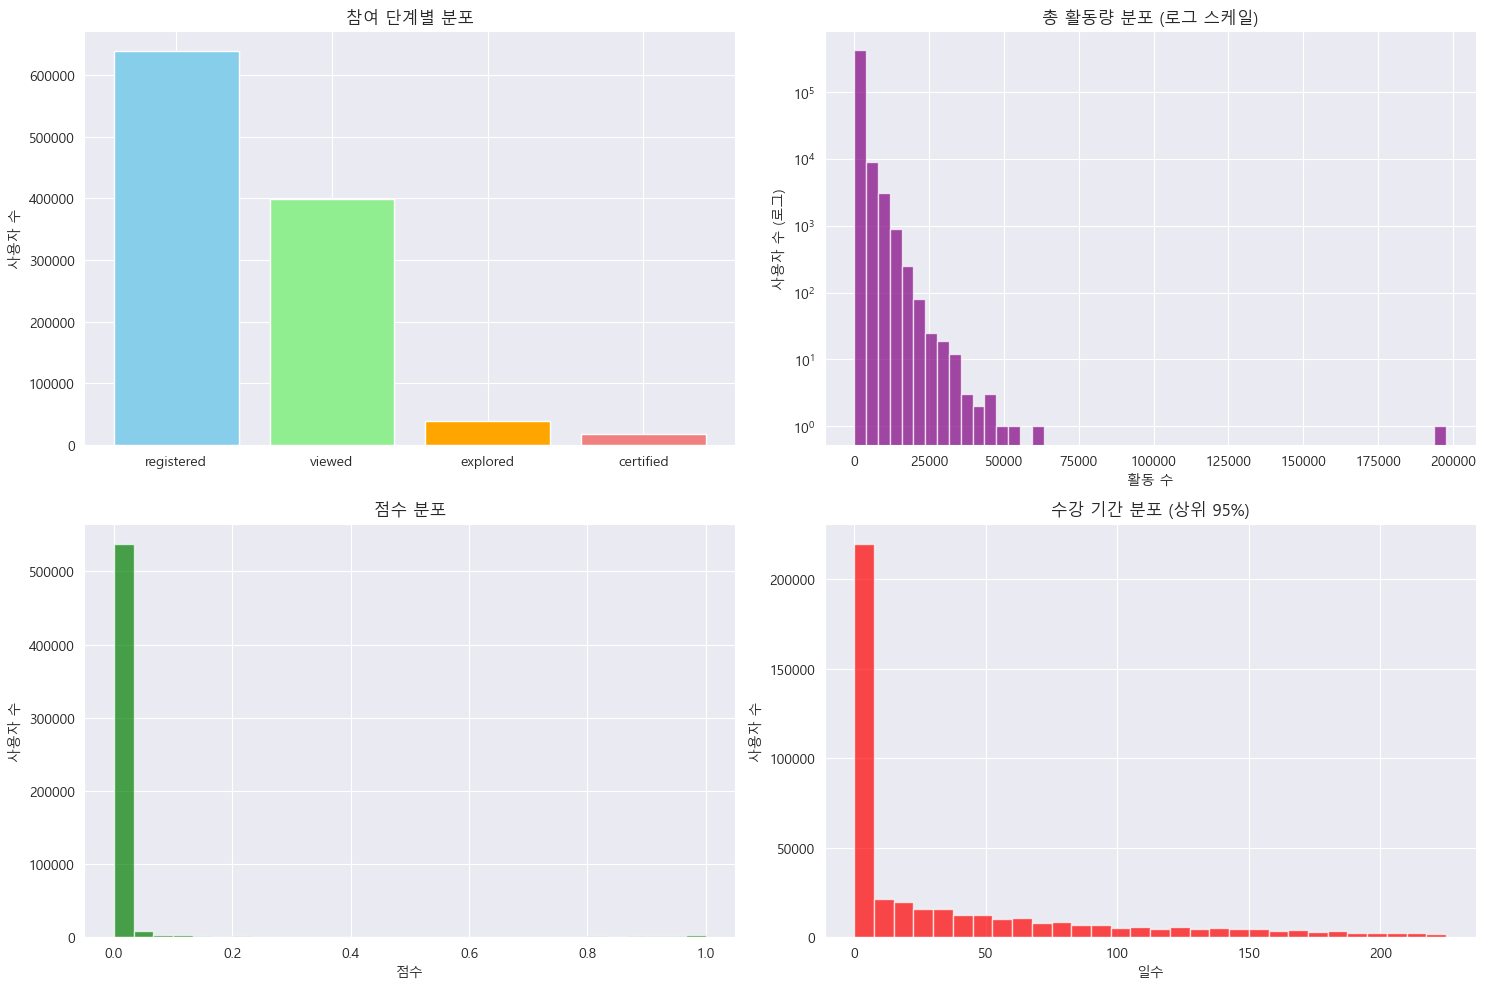


전체 이상치 요약
총 감지된 이상치: 142,635개
전체 데이터 대비: 22.32%

심각한 논리적 오류: 8개
   - 보지 않았는데 탐색/수료: 8개


In [3]:
# 데이터 품질 및 논리적 일관성 체크
# 온라인 강의 플랫폼 데이터 이상치 탐지

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def load_data():
    """데이터 로드"""
    data_path = "preprocessed_course_data.csv"
    df = pd.read_csv(data_path)
    print(f"데이터 로드: {df.shape}")
    return df

def check_participation_logic(df):
    """참여 단계의 논리적 순서 체크"""
    print("1. 참여 단계 논리적 순서 체크")
    print("-" * 40)

    issues = {}

    # registered=False인데 다른 활동이 True인 경우
    condition1 = (df['registered'] == False) & (
        (df['viewed'] == True) |
        (df['explored'] == True) |
        (df['certified'] == True)
    )
    issues['no_register_but_active'] = condition1.sum()

    # viewed=False인데 explored=True 또는 certified=True인 경우
    condition2 = (df['viewed'] == False) & (
        (df['explored'] == True) |
        (df['certified'] == True)
    )
    issues['no_view_but_advanced'] = condition2.sum()

    # explored=False인데 certified=True인 경우
    condition3 = (df['explored'] == False) & (df['certified'] == True)
    issues['no_explore_but_certified'] = condition3.sum()

    # 결과 출력
    print(f"등록하지 않았는데 활동한 경우: {issues['no_register_but_active']:,}개")
    print(f"보지 않았는데 탐색/수료한 경우: {issues['no_view_but_advanced']:,}개")
    print(f"탐색하지 않았는데 수료한 경우: {issues['no_explore_but_certified']:,}개")

    return issues

def check_activity_consistency(df):
    """활동 데이터 일관성 체크"""
    print("\n2. 활동 데이터 일관성 체크")
    print("-" * 40)

    issues = {}

    # ndays_act=0인데 nevents>0인 경우
    condition1 = (df['ndays_act'] == 0) & (df['nevents'] > 0)
    issues['no_days_but_events'] = condition1.sum()

    # nevents=0인데 nchapters>0인 경우
    condition2 = (df['nevents'] == 0) & (df['nchapters'] > 0)
    issues['no_events_but_chapters'] = condition2.sum()

    # nevents=0인데 nforum_posts>0인 경우
    condition3 = (df['nevents'] == 0) & (df['nforum_posts'] > 0)
    issues['no_events_but_forum'] = condition3.sum()

    # viewed=True인데 nevents=0인 경우 (봤는데 활동이 없음)
    condition4 = (df['viewed'] == True) & (df['nevents'] == 0)
    issues['viewed_but_no_events'] = condition4.sum()

    print(f"활동일수 0인데 이벤트가 있는 경우: {issues['no_days_but_events']:,}개")
    print(f"이벤트 0인데 챕터 수강한 경우: {issues['no_events_but_chapters']:,}개")
    print(f"이벤트 0인데 포럼 글 작성한 경우: {issues['no_events_but_forum']:,}개")
    print(f"컨텐츠를 봤는데 이벤트가 0인 경우: {issues['viewed_but_no_events']:,}개")

    return issues

def check_grade_consistency(df):
    """점수와 수료 상태 일관성 체크"""
    print("\n3. 점수와 수료 상태 일관성 체크")
    print("-" * 40)

    issues = {}

    # certified=False인데 grade>0인 경우
    condition1 = (df['certified'] == False) & (df['grade'] > 0)
    issues['not_certified_but_grade'] = condition1.sum()

    # certified=True인데 grade=0인 경우
    condition2 = (df['certified'] == True) & (df['grade'] == 0)
    issues['certified_but_no_grade'] = condition2.sum()

    # certified=True인데 grade가 NaN인 경우
    condition3 = (df['certified'] == True) & (df['grade'].isna())
    issues['certified_but_grade_nan'] = condition3.sum()

    print(f"수료하지 않았는데 점수가 있는 경우: {issues['not_certified_but_grade']:,}개")
    print(f"수료했는데 점수가 0인 경우: {issues['certified_but_no_grade']:,}개")
    print(f"수료했는데 점수가 NaN인 경우: {issues['certified_but_grade_nan']:,}개")

    return issues

def check_time_anomalies(df):
    """시간 관련 이상치 체크"""
    print("\n4. 시간 관련 이상치 체크")
    print("-" * 40)

    # 날짜 변환
    df_temp = df.copy()
    df_temp['start_time_DI'] = pd.to_datetime(df_temp['start_time_DI'], errors='coerce')
    df_temp['last_event_DI'] = pd.to_datetime(df_temp['last_event_DI'], errors='coerce')
    df_temp['course_duration'] = (df_temp['last_event_DI'] - df_temp['start_time_DI']).dt.days

    issues = {}

    # 활동일수가 전체 수강기간보다 긴 경우
    condition1 = df_temp['ndays_act'] > df_temp['course_duration']
    issues['activity_days_exceed_duration'] = condition1.sum()

    # 비정상적으로 긴 수강기간 (5년 이상)
    condition2 = df_temp['course_duration'] > 1825  # 5년
    issues['extremely_long_duration'] = condition2.sum()

    # 음수 수강기간 (이미 처리했지만 재확인)
    condition3 = df_temp['course_duration'] < 0
    issues['negative_duration'] = condition3.sum()

    # 수강기간 통계
    duration_stats = df_temp['course_duration'].describe()

    print(f"활동일수가 수강기간보다 긴 경우: {issues['activity_days_exceed_duration']:,}개")
    print(f"5년 이상 수강한 경우: {issues['extremely_long_duration']:,}개")
    print(f"음수 수강기간: {issues['negative_duration']:,}개")
    print(f"\n수강기간 통계:")
    print(f"   평균: {duration_stats['mean']:.1f}일")
    print(f"   중간값: {duration_stats['50%']:.1f}일")
    print(f"   최대값: {duration_stats['max']:.0f}일")

    return issues, duration_stats

def check_extreme_values(df):
    """극단적 이상치 체크"""
    print("\n5. 극단적 이상치 체크")
    print("-" * 40)

    issues = {}

    # 일일 활동량 계산
    df_temp = df.copy()
    df_temp['events_per_day'] = df_temp['nevents'] / (df_temp['ndays_act'] + 1)  # 0으로 나누기 방지

    # 비정상적으로 많은 일일 활동 (1000회 이상)
    condition1 = df_temp['events_per_day'] > 1000
    issues['extreme_daily_events'] = condition1.sum()

    # 비정상적으로 많은 포럼 글 (1000개 이상)
    condition2 = df_temp['nforum_posts'] > 1000
    issues['extreme_forum_posts'] = condition2.sum()

    # 비정상적으로 많은 챕터 (500개 이상)
    condition3 = df_temp['nchapters'] > 500
    issues['extreme_chapters'] = condition3.sum()

    # 비정상적으로 많은 총 이벤트 (100000회 이상)
    condition4 = df_temp['nevents'] > 100000
    issues['extreme_total_events'] = condition4.sum()

    print(f"일일 1000회 이상 활동한 경우: {issues['extreme_daily_events']:,}개")
    print(f"포럼 글 1000개 이상 작성한 경우: {issues['extreme_forum_posts']:,}개")
    print(f"챕터 500개 이상 수강한 경우: {issues['extreme_chapters']:,}개")
    print(f"총 이벤트 100000회 이상인 경우: {issues['extreme_total_events']:,}개")

    # 극단값들의 통계
    print(f"\n활동량 상위 1% 통계:")
    top_1_percent = df_temp['nevents'].quantile(0.99)
    top_events = df_temp[df_temp['nevents'] >= top_1_percent]['nevents']
    print(f"   상위 1% 기준값: {top_1_percent:.0f}회")
    print(f"   최대값: {top_events.max():,}회")

    return issues

def check_missing_patterns(df):
    """결측치 패턴 분석"""
    print("\n6. 결측치 패턴 분석")
    print("-" * 40)

    # 전체 결측치 비율
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    missing_rate = (total_missing / total_cells) * 100

    print(f"전체 결측치 비율: {missing_rate:.2f}%")

    # 컬럼별 결측치
    missing_by_col = df.isnull().sum()
    missing_cols = missing_by_col[missing_by_col > 0]

    if len(missing_cols) > 0:
        print(f"\n결측치가 있는 컬럼:")
        for col, count in missing_cols.items():
            pct = (count / len(df)) * 100
            print(f"   {col}: {count:,}개 ({pct:.1f}%)")

    # 모든 값이 결측인 행
    all_missing_rows = df.isnull().all(axis=1).sum()
    print(f"\n모든 값이 결측인 행: {all_missing_rows}개")

    return missing_by_col

def visualize_issues(df):
    """이상치 시각화"""
    print("\n이상치 시각화")
    print("-" * 40)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 1. 참여 단계별 분포
    participation_cols = ['registered', 'viewed', 'explored', 'certified']
    participation_counts = [df[col].sum() for col in participation_cols]

    axes[0,0].bar(participation_cols, participation_counts, color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
    axes[0,0].set_title('참여 단계별 분포')
    axes[0,0].set_ylabel('사용자 수')

    # 2. 활동량 분포 (로그 스케일)
    axes[0,1].hist(df['nevents'], bins=50, alpha=0.7, color='purple')
    axes[0,1].set_yscale('log')
    axes[0,1].set_title('총 활동량 분포 (로그 스케일)')
    axes[0,1].set_xlabel('활동 수')
    axes[0,1].set_ylabel('사용자 수 (로그)')

    # 3. 점수 분포
    axes[1,0].hist(df['grade'].dropna(), bins=30, alpha=0.7, color='green')
    axes[1,0].set_title('점수 분포')
    axes[1,0].set_xlabel('점수')
    axes[1,0].set_ylabel('사용자 수')

    # 4. 수강 기간 분포 (상위 95%만)
    df_temp = df.copy()
    df_temp['start_time_DI'] = pd.to_datetime(df_temp['start_time_DI'], errors='coerce')
    df_temp['last_event_DI'] = pd.to_datetime(df_temp['last_event_DI'], errors='coerce')
    df_temp['duration'] = (df_temp['last_event_DI'] - df_temp['start_time_DI']).dt.days

    duration_95 = df_temp['duration'].quantile(0.95)
    duration_filtered = df_temp['duration'][df_temp['duration'] <= duration_95]

    axes[1,1].hist(duration_filtered.dropna(), bins=30, alpha=0.7, color='red')
    axes[1,1].set_title('수강 기간 분포 (상위 95%)')
    axes[1,1].set_xlabel('일수')
    axes[1,1].set_ylabel('사용자 수')

    plt.tight_layout()
    plt.show()

def main():
    """메인 실행 함수"""
    print("온라인 강의 데이터 품질 및 논리적 일관성 체크")
    print("=" * 60)

    # 데이터 로드
    df = load_data()

    # 각종 체크 실행
    participation_issues = check_participation_logic(df)
    activity_issues = check_activity_consistency(df)
    grade_issues = check_grade_consistency(df)
    time_issues, duration_stats = check_time_anomalies(df)
    extreme_issues = check_extreme_values(df)
    missing_info = check_missing_patterns(df)

    # 시각화
    visualize_issues(df)

    # 전체 요약
    print("\n" + "=" * 60)
    print("전체 이상치 요약")
    print("=" * 60)

    all_issues = {**participation_issues, **activity_issues, **grade_issues,
                  **time_issues, **extreme_issues}

    total_issues = sum(all_issues.values())
    print(f"총 감지된 이상치: {total_issues:,}개")
    print(f"전체 데이터 대비: {(total_issues/len(df)*100):.2f}%")

    # 심각한 이상치 (논리적으로 말이 안 되는 것들)
    critical_issues = {
        '등록하지 않았는데 활동': participation_issues.get('no_register_but_active', 0),
        '보지 않았는데 탐색/수료': participation_issues.get('no_view_but_advanced', 0),
        '수료했는데 점수 NaN': grade_issues.get('certified_but_grade_nan', 0),
        '음수 수강기간': time_issues.get('negative_duration', 0)
    }

    critical_total = sum(critical_issues.values())
    print(f"\n심각한 논리적 오류: {critical_total:,}개")
    for issue, count in critical_issues.items():
        if count > 0:
            print(f"   - {issue}: {count:,}개")

    return df, all_issues

# 실행
if __name__ == "__main__":
    df, issues = main()

온라인 강의 데이터 품질 및 논리적 일관성 체크
============================================================
데이터 로드: (639086, 20)
1. 참여 단계 논리적 순서 체크
----------------------------------------
등록하지 않았는데 활동한 경우: 0개
보지 않았는데 탐색/수료한 경우: 8개 -- 삭제 필요
탐색하지 않았는데 수료한 경우: 690개 -- 그럴 수 있음

2. 활동 데이터 일관성 체크
----------------------------------------
활동일수 0인데 이벤트가 있는 경우: 0개
이벤트 0인데 챕터 수강한 경우: 0개
이벤트 0인데 포럼 글 작성한 경우: 46개 -- 그럴 수 있음
컨텐츠를 봤는데 이벤트가 0인 경우: 0개

3. 점수와 수료 상태 일관성 체크
----------------------------------------
수료하지 않았는데 점수가 있는 경우: 56,599개 -- fail 점수 예상
수료했는데 점수가 0인 경우: 1개 -- 이상하긴 하지만 점수로 수료 가능한 강의가 아닐 수 도
수료했는데 점수가 NaN인 경우: 0개

4. 시간 관련 이상치 체크
----------------------------------------
활동일수가 수강기간보다 긴 경우: 85,266개 - 활동을 더 오래한 사람?
5년 이상 수강한 경우: 0개
음수 수강기간: 0개

수강기간 통계:
   평균: 50.9일
   중간값: 11.0일
   최대값: 409일

5. 극단적 이상치 체크
----------------------------------------
일일 1000회 이상 활동한 경우: 24개
포럼 글 1000개 이상 작성한 경우: 0개
챕터 500개 이상 수강한 경우: 0개
총 이벤트 100000회 이상인 경우: 1개

활동량 상위 1% 통계:
   상위 1% 기준값: 7868회
   최대값: 197,757.0회 -- 상위 1%로 대체

6. 결측치 패턴 분석
----------------------------------------
전체 결측치 비율: 10.25% - 문제 없어 보임.

결측치가 있는 컬럼:
   grade: 56,742개 (8.9%)
   last_event_DI: 178,625개 (28.0%)
   nevents: 198,714개 (31.1%)
   ndays_act: 162,431개 (25.4%)
   nplay_video: 455,824개 (71.3%)
   nchapters: 257,711개 (40.3%)

모든 값이 결측인 행: 0개